欠損値の数を確認

In [40]:
import pandas as pd
df = pd.read_csv("data/vgsales.csv")
df[df["Year"].isna()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


辞書で欠損地を埋める

In [42]:
df = pd.read_csv("data/vgsales.csv")
pub_na_idx = df[df["Publisher"].isna()].index
df.fillna({"Publisher": "NaN", "Year": df["Year"].median()}, inplace=True)
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


NanとUnknownに違いがないか確認

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


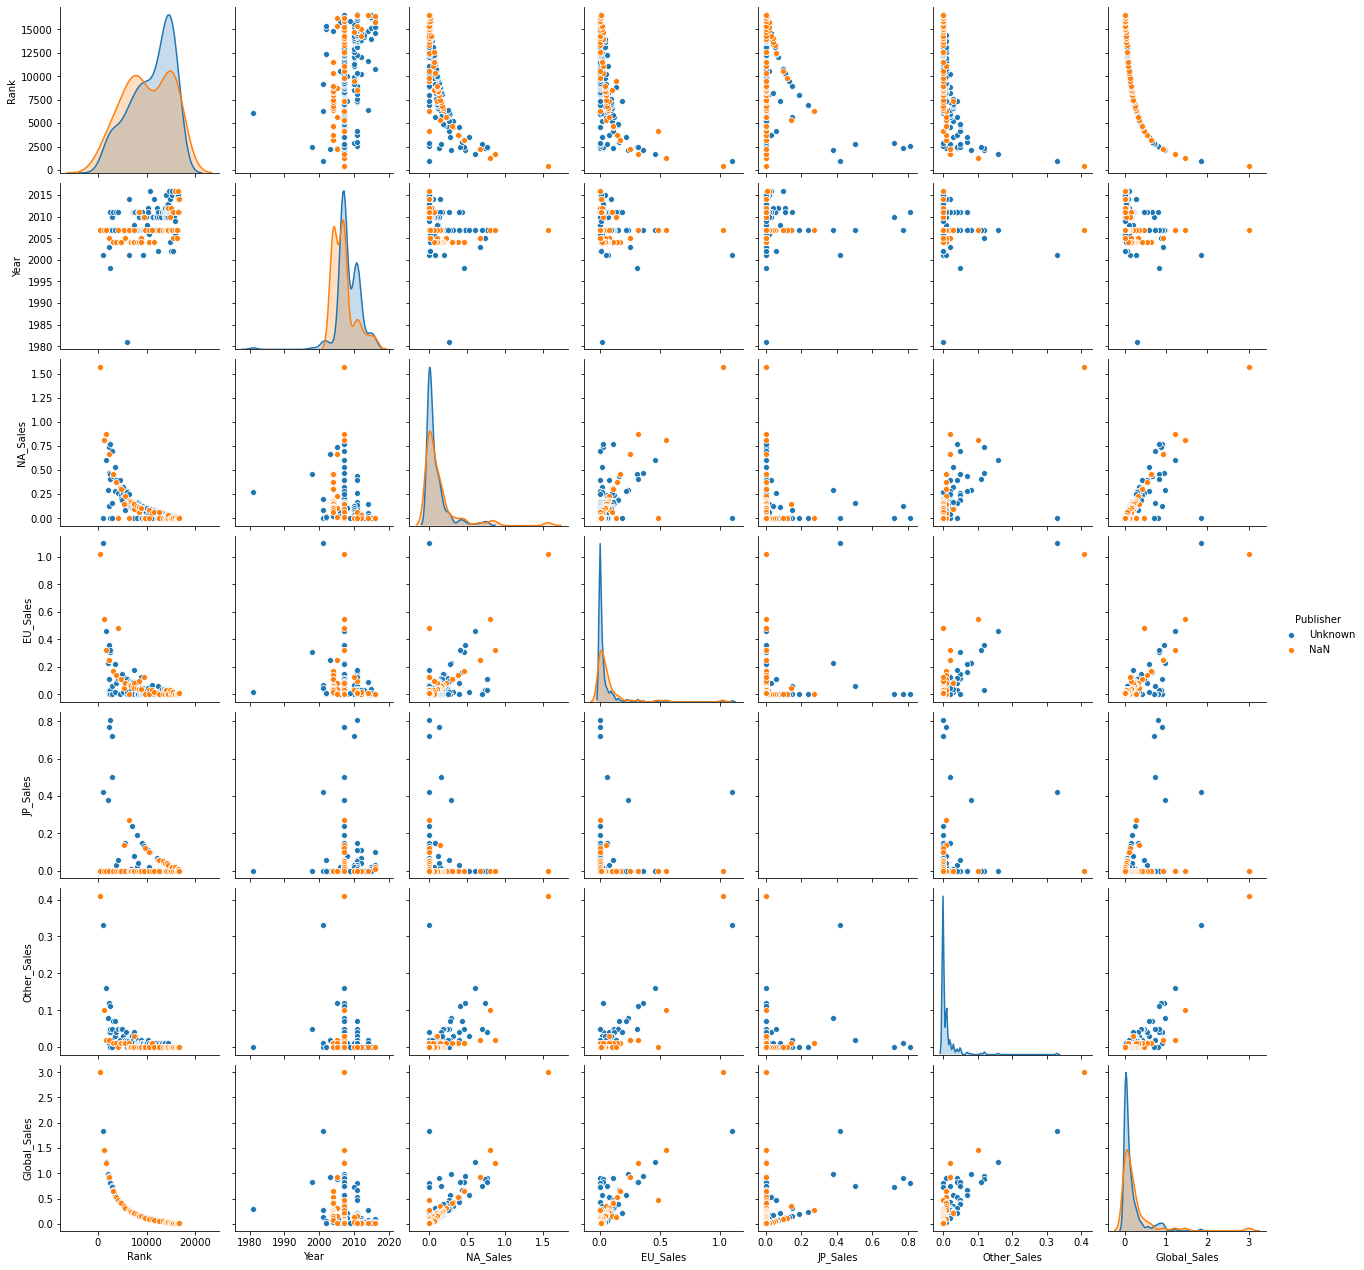

In [24]:
pub_nan_df = df[df["Publisher"] == "NaN"]
pub_unknown_df = df[df["Publisher"] == "Unknown"]
pub_missing_df = pd.concat([pub_unknown_df, pub_nan_df])

import seaborn as sns
sns.pairplot(pub_missing_df, hue="Publisher")


SimpleImputerという便利機能もある。

In [28]:
from sklearn.impute import SimpleImputer
df = pd.read_csv("data/vgsales.csv")
imputer = SimpleImputer(strategy="median")
df["Year"] = imputer.fit_transform(df[["Year"]])
imputer = SimpleImputer(strategy="most_frequent")
df["Publisher"] = imputer.fit_transform(df[["Publisher"]])
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [49]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
df = pd.read_csv("data/vgsales.csv")
df.drop("Global_Sales", inplace=True, axis=1)
target = "JP_Sales"
X = df.drop(target, axis=1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
platform_year_dict = X_train.groupby("Platform").median()["Year"].to_dict()
df = pd.read_csv("data/vgsales.csv")
X_train["Year"] = X_train.apply(lambda row:  platform_year_dict[row["Platform"]] if np.isnan(row["Year"]) and row["Platform"] in platform_year_dict else row["Year"], axis=1)

<ipython-input-49-65d22fbd0c5b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["Year"] = X_train.apply(lambda row:  platform_year_dict[row["Platform"]] if np.isnan(row["Year"]) and row["Platform"] in platform_year_dict else row["Year"], axis=1)


In [50]:
X_train

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Other_Sales
15294,15297,Detective Jinguuji Saburo: Ronde Revenge,3DS,2012.0,Action,Arc System Works,0.00,0.00,0.00
5849,5851,NASCAR 2011: The Game,X360,2011.0,Racing,Activision,0.29,0.00,0.02
14070,14072,"My World, My Way (US sales)",DS,2008.0,Role-Playing,Global A Entertainment,0.04,0.00,0.00
11163,11165,R: Racing Evolution,XB,2003.0,Racing,Namco Bandai Games,0.06,0.02,0.00
11064,11066,Shin Ken to Mah? to Gakuenmono. Toki no Gakuen,PSP,2012.0,Role-Playing,Acquire,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
9225,9227,Persona 4: Arena Ultimax,PS3,2014.0,Fighting,Atlus,0.00,0.01,0.00
13123,13125,Steins;Gate 0,PS4,2015.0,Adventure,PQube,0.00,0.00,0.00
9845,9847,Super Robot Wars OG Saga: Masou Kishin - The L...,DS,2010.0,Strategy,Namco Bandai Games,0.00,0.00,0.00
10799,10801,Mind Quiz,PSP,2006.0,Action,Ubisoft,0.08,0.01,0.01


kNNImputerを使う

In [58]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
imputer = KNNImputer(n_neighbors=3)

df = pd.get_dummies(df, drop_first=True)

num_cols = X.select_dtypes(include=np.number).columns.to_list()
df[num_cols] = StandardScaler().fit_transform(df[num_cols])
df_imputed = imputer.fit_transform(df)